In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import scipy
from scipy import stats

In [2]:
df = pd.read_excel('dados_brutos.xlsx')

In [3]:
#como pegar os itens unicos sem usar set!!!
# user_unico = {}
# for k,v in users.items():
#     if v not in user_unico.keys():
#         user_unico[v] = 1
#     else:
#         user_unico[v] += 1

In [4]:
orgs = df['organization_id']
users = df['user']
org_u = set(orgs)
dic_userPorOrg = {}
for i,org in enumerate(org_u):
    df_aux = df.loc[(df["organization_id"] == org),:]
    user_aux = df_aux["user"]
    dic_userPorOrg[org] = len(set(user_aux))


In [5]:
organizations = []
n_users = []
for k,v in dic_userPorOrg.items():
    organizations.append(k)
    n_users.append(v)

df_userPorOrg = pd.DataFrame({
    'organization_id': organizations,
    'N_users': n_users
})

df_userPorOrg = df_userPorOrg.sort_values(ascending=False, by='N_users').reset_index(drop=True)

In [6]:
dic_pathPorOrg = {}
paths_list_t = []
orgs = df_userPorOrg["organization_id"]

for org in orgs:
    path_aux = df.loc[(df["organization_id"] == org),(["path_actions"])]
    paths_list_u = []
    lista = [ast.literal_eval(paths[0]) for paths in path_aux.values]
    paths_list_u.extend((set(lista[0]))) #extend adiciona cada elemento da lista em paths_list
    paths_list_t.extend((lista[0])) #extend adiciona cada elemento da lista em paths_list_u
    dic_pathPorOrg[org] = (set(paths_list_u))

df_paths = pd.DataFrame()
df_paths['Count'] = pd.Series(paths_list_t).value_counts().values
df_paths['Actions'] = pd.Series(paths_list_t).value_counts().keys()

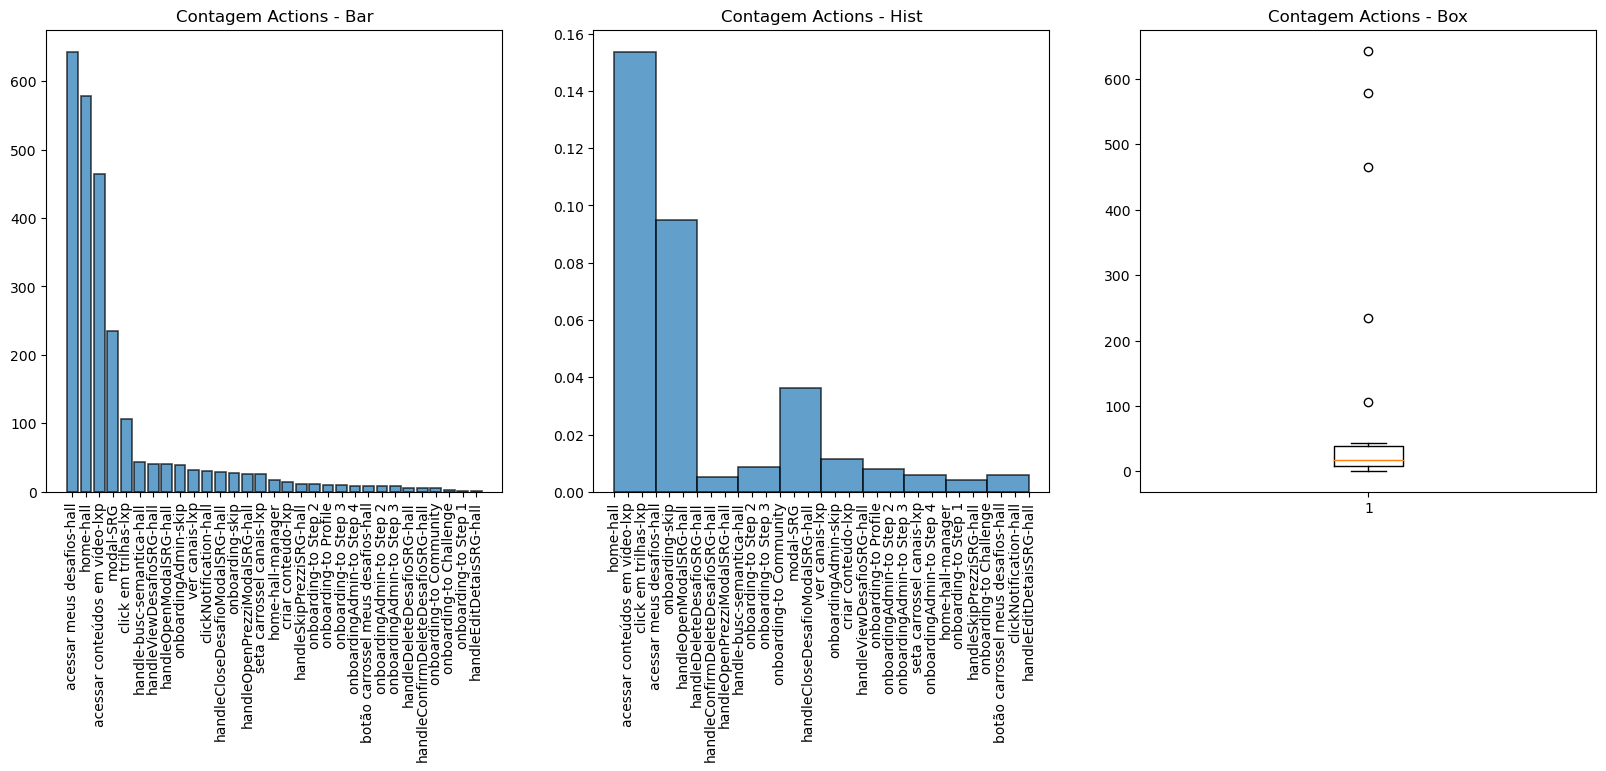

In [18]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.bar(df_paths['Actions'], df_paths['Count'], edgecolor='black', linewidth=1.2, alpha=0.7)
plt.xticks(rotation=90)
plt.title('Contagem Actions - Bar')

plt.subplot(1,3,2)
plt.hist(paths_list_t, edgecolor='black', linewidth=1.2, alpha=0.7, density=True)
plt.xticks(rotation=90)
plt.title('Contagem Actions - Hist')

plt.subplot(1,3,3)
plt.boxplot(df_paths['Count'])
plt.title('Contagem Actions - Box')
plt.show()

In [8]:
organizations2 = []
paths = []
for k,v in dic_pathPorOrg.items():
    organizations2.append(k)
    paths.append(v)

df_pathPorOrg = pd.DataFrame({
    'organization_id': organizations2,
    'Paths': paths
})

In [9]:
df_pathPorOrg.head(20)

,organization_id,Paths
0,4f3e63d2-43f8-4886-addc-9ce039eab5f1,"{acessar conteúdos em vídeo-lxp, click em tril..."
1,4adb5f9b-f50a-4957-a7e3-94c3452d877c,"{acessar conteúdos em vídeo-lxp, acessar meus ..."
2,d3400673-a5b2-4914-bf57-ce98dc710603,"{handleOpenModalSRG-hall, handleConfirmDeleteD..."
3,c81fa8b0-52c0-4a31-abb7-6776a76cc9c8,"{acessar conteúdos em vídeo-lxp, click em tril..."
4,347ceb13-8656-4ed0-b080-c6cfb5528b25,{home-hall}
5,9e3e7a95-c6f5-4b6f-b189-8f33e45ee425,"{handle-busc-semantica-hall, acessar meus desa..."
6,abba8235-15bd-4285-90b4-104e9308013e,"{acessar conteúdos em vídeo-lxp, onboarding-sk..."
7,50ca2381-2d91-4d7e-8300-bb625d5cb97f,"{acessar conteúdos em vídeo-lxp, acessar meus ..."
8,c8c88852-b101-4b47-aaca-4cee45368c9f,"{handleCloseDesafioModalSRG-hall, modal-SRG, a..."
9,6019ee26-09c3-422e-8c25-0abe878d1a73,"{acessar conteúdos em vídeo-lxp, click em tril..."


In [10]:
action_d = {}
novo_path_list = [0]*len(paths_list_t)
cont = 0
for i,path in enumerate(paths_list_t):
    if path not in action_d.keys():
        action_d[path] = cont
        cont += 1

for i,path in enumerate(paths_list_t):
    novo_path_list[i] = action_d[path]

In [11]:
mean = np.mean(novo_path_list)
median = np.median(novo_path_list)
mode = stats.mode(novo_path_list)
dp = np.std(novo_path_list)
print(f'Mean: {mean}, median: {median}, mode: {mode}, dp: {dp}')

Mean: 5.097512038523274, median: 3.0, mode: ModeResult(mode=array([3]), count=array([643])), dp: 6.76026371968183


C:\Users\Felipe\AppData\Local\Temp\ipykernel_9548\4086798946.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(novo_path_list)


In [12]:
x = np.linspace(0,30,1001)
fx = (stats.norm.pdf(x, loc=mean, scale=dp))

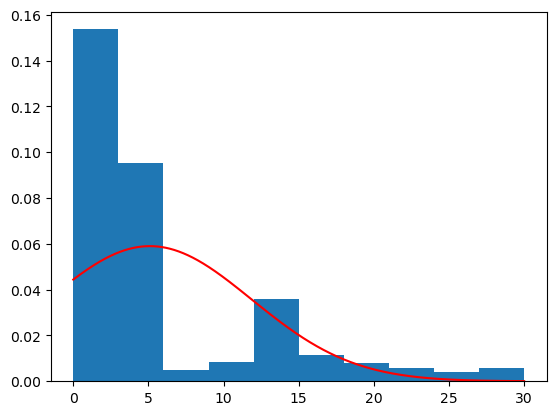

In [13]:
plt.hist(novo_path_list, density=True)
plt.plot(x, fx, color='red')
plt.show()

In [ ]:
print('OIOIOIOIOIOI')